<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S4_3_1_Conna%C3%AEtre_les_fleurs_avec_PCA_Exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connaître les fleurs avec PCA 

Apprenons à mieux utiliser la PCA avec le dataset d'iris. 

0. Importez les librairies usuelles 

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt

1. Importez les données venant du l'URL suivant : 

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [0]:
#f=open("iris.data", "r")
#if f.mode == 'r':
#  contents = f.readlines()
df = pd.read_csv("iris.data",header=None )
df.columns = ["sepal length" ,"sepal width","petal length","petal width","target"]
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Séparez votre dataset en ```X``` variables explicatives et ```y``` variable cible 

In [0]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y)

3. Normalisez vos variables explicatives & mettez ces données dans un DataFrame

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X)
X_test = sc_x.transform(X)

X_train

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


4. Importez PCA et initialisez à 2 composants principaux 

In [0]:
from sklearn.decomposition import PCA
pca =PCA(n_components=2, random_state=42)

5. Appliquez PCA à votre X et stockez ces nouvelles valeurs dans un DataFrame qu'on appellera ```principalDF```

In [0]:
principalDF = pca.fit_transform(X_train)
principalDF = pd.DataFrame(principalDF, columns = ["comp1", "comp2"])
principalDF.head()

,comp1,comp2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


6. Visualisez ce que donne votre PCA. Dans un scatterplot, mettez en abscisse le premier composant, en ordonnée le second et mettez un hue dans laquelle vous avez votre target 

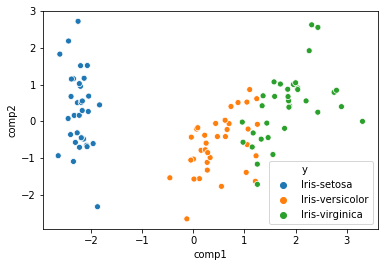

In [0]:
principalDF['y'] = y_train
sns.scatterplot(x= "comp1", y = "comp2", hue= "y", data = principalDF)

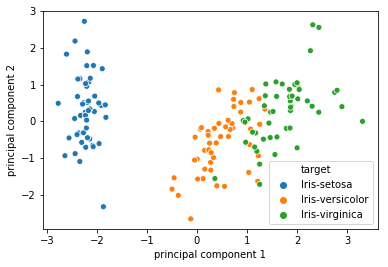

7. Regardez la ```variance explained``` que pouvez vous dire ?

array([0.72770452, 0.23030523])